In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [55]:
%matplotlib inline
train_dir = 'data/faces/train/'

gen = ImageDataGenerator(rotation_range=45, 
                         width_shift_range=0.05,
                         height_shift_range=0.05,
                         shear_range=0.03,
                         horizontal_flip=True)

train_batches = gen.flow_from_directory(train_dir,
                                       batch_size=4,
                                       class_mode='categorical',
                                       color_mode='grayscale',
                                       target_size=(48,48))

def tf_data_to_grayscale_image(array):
    w, h, _ = array.shape
    return Image.fromarray(np.reshape(array, (w,h)).astype(np.uint8))

def plot_images(imgs, labels):
    nb_imgs = len(imgs)
    plot = plt.figure(figsize=(15,60))
    for i in range(nb_imgs):
        plot_i = plot.add_subplot(1,nb_imgs,i + 1)
        plot_i.set_title(labels[i])
        plt.imshow(tf_data_to_grayscale_image(imgs[i]))

Found 14961 images belonging to 3 classes.


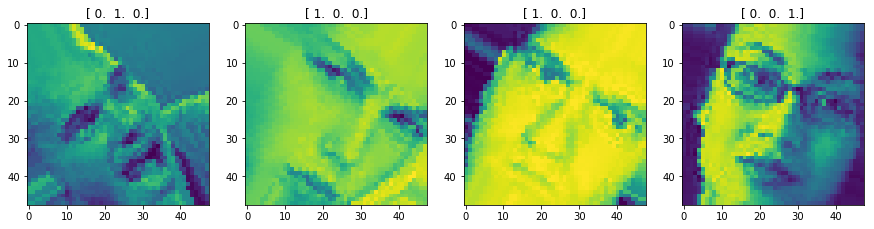

In [70]:
imgs, labels = next(train_batches)

plot_images(imgs, labels)